In [ ]:
!git clone -b unet-gan https://github.com/hoangbros03/GAN-implement.git

# https://drive.google.com/file/d/1_0wdwSiL1dp-ewkVK2RD663fqmuL36BI/view?usp=sharing
from zipfile import ZipFile
with ZipFile("/content/drive/MyDrive/img_align_celeba.zip", 'r') as zObject:
    zObject.extractall(path="celeb-a")

Cloning into 'GAN-implement'...
remote: Enumerating objects: 20443, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 20443 (delta 87), reused 162 (delta 70), pack-reused 20258
Receiving objects: 100% (20443/20443), 522.98 MiB | 37.26 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
import os
os.chdir('GAN-implement/src/unet_gan')

In [ ]:
from train import Trainer
from reader import Reader
import torch
import torch.nn as nn

In [ ]:
dataroot = "/content/celeb-a"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
reader = Reader(dataroot=dataroot, batch_size=32, workers=2, image_size=64)
dataloader = reader.path_to_dataloader()

In [ ]:
trainer = Trainer(device=device)
trainer.train_loop(dataloader, num_epochs=10, D_G_train_proportion=2)

  0%|          | 0/10 [00:00<?, ?it/s]

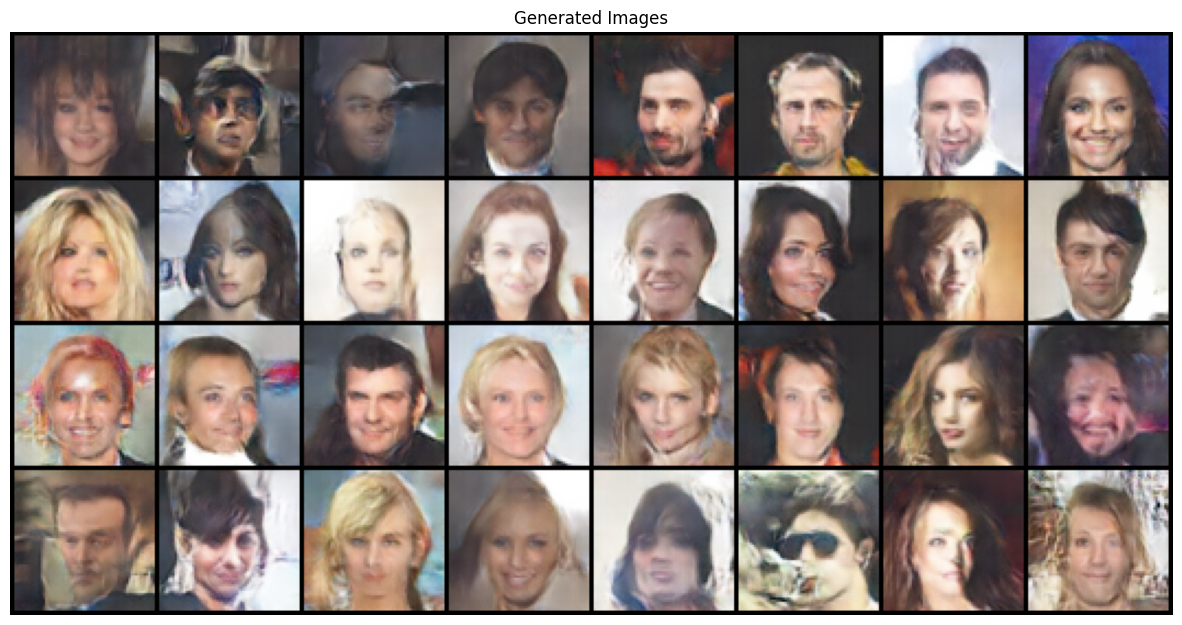

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils

# # Grab a batch of real images from the dataloader
# real_batch = next(iter(dataloader))

# # Plot the real images
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.axis("off")
# plt.title("Real Images")
# plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.figure(figsize=(15, 15))
plt.axis("off")
plt.title("Generated Images")
plt.imshow(np.transpose(trainer.img_list[-1],(1,2,0)))
plt.savefig('gan-1')
plt.show()

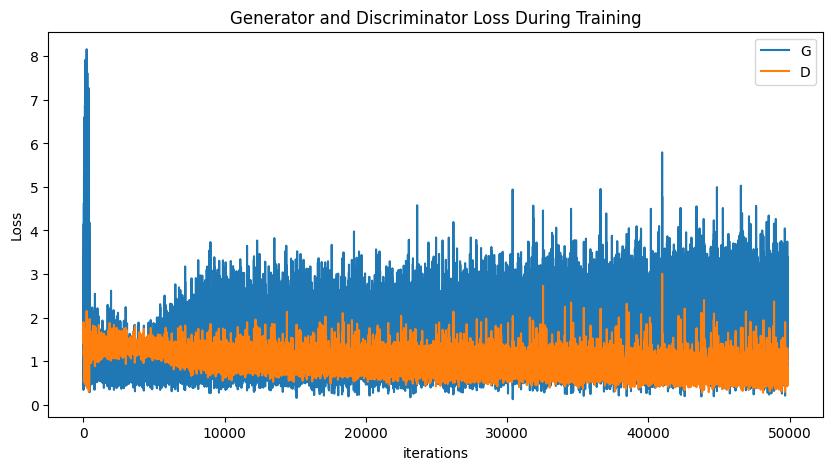

In [ ]:
Splt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(trainer.G_losses,label="G")
plt.plot(trainer.D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [1]:
import torch
_ = torch.manual_seed(123)
from torchmetrics.image.kid import KernelInceptionDistance
kid = KernelInceptionDistance(subset_size=50)
# generate two slightly overlapping image intensity distributions
imgs_dist1 = torch.randint(0, 200, (100, 3, 299, 299), dtype=torch.uint8)
imgs_dist2 = torch.randint(100, 255, (100, 3, 299, 299), dtype=torch.uint8)
kid.update(imgs_dist1, real=True)
kid.update(imgs_dist2, real=False)
kid_mean, kid_std = kid.compute()
print((kid_mean, kid_std))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: Metric `Kernel Inception Distance` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028
Downloading: "https://github.com/toshas/torch-fidelity/releases/download/v0.2.0/weights-inception-2015-12-05-6726825d.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\weights-inception-2015-12-05-6726825d.pth
100%|██████████| 91.2M/91.2M [00:16<00:00, 5.71MB/s]


(tensor(0.0337), tensor(0.0023))
